# Level 1 

## Task 4 : Online Delivery

* Determine the percentage of restaurants that offer online delivery.
* Compare the average ratings of restaurants with and without online delivery.

### Loading necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [2]:
url = "https://drive.google.com/uc?export=download&id=1dKZxapT3xLzOTOpy1LCyqctL8YEvzp4Y"
df = pd.read_csv(url)
#previewing first few rows of the dataset
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
# Checking the total number of rows and columns
df.shape

(9551, 21)

### Calculating number of restaurants that offer online delivery

In [4]:
mode_count = df.groupby(df["Has Online delivery"]).agg({"Restaurant ID":"count"})

#Renaming the columns
mode_count.columns = ["Number of Restaurants"]

#sorting the values
mode_count = mode_count.sort_values(by = 'Number of Restaurants')

print(mode_count)

                     Number of Restaurants
Has Online delivery                       
Yes                                   2451
No                                    7100


### Determining the percentage of restaurants offering online delivery

In [5]:
mode_percentage = round((mode_count/mode_count.sum())*100,2)

#renaming the columns
mode_percentage.columns = ["Percentage of Restaurants"]

print(mode_percentage)
print("\nPercentage of restaurants that have online delivery :" ,mode_percentage.loc["Yes","Percentage of Restaurants"],"%")

                     Percentage of Restaurants
Has Online delivery                           
Yes                                      25.66
No                                       74.34

Percentage of restaurants that have online delivery : 25.66 %


### Calculating the average ratings of restaurants with or without online delivery

In [6]:
mode_rating_comparision = df.groupby(df["Has Online delivery"]).agg({"Aggregate rating":"mean"})

#rounding off to 1 decimal place
mode_rating_comparision = round(mode_rating_comparision,1)

#renaming the columns
mode_rating_comparision.columns = ['Average Rating']

#sorting the values
mode_rating_comparision = mode_rating_comparision.sort_values(by='Average Rating', ascending=False)

print(mode_rating_comparision)

                     Average Rating
Has Online delivery                
Yes                             3.2
No                              2.5


### Visualizing the relation between Number of Restaurants and Average Ratings based on Mode of service

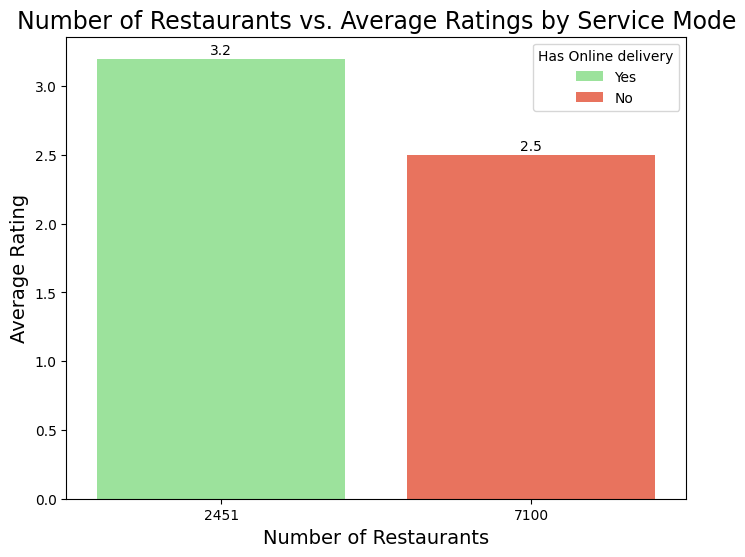

In [7]:
#creating the figure
plt.figure(figsize=(8, 6))

#creating a bar chart
sns.barplot( x = mode_count["Number of Restaurants"] , y =  mode_rating_comparision["Average Rating"]  , hue = mode_count.index , palette = ["lightgreen","tomato"])
plt.xlabel('Number of Restaurants', fontsize = 14)
plt.ylabel('Average Rating' , fontsize = 14)
plt.title('Number of Restaurants vs. Average Ratings by Service Mode' , fontsize = 17)

# adding data labels
for index, value in enumerate(mode_rating_comparision["Average Rating"]):
    plt.text(index, value + 0.03 , value  , ha = "center", fontsize=10, color='black')
    
plt.show()